### Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

In [111]:
df = pd.read_csv('Meteorite_Landings.csv')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Unnamed: 10
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN


### Details about the data

In [112]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.8+ MB


,id,mass (g),year,reclat,reclong,Unnamed: 10
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000,0.0
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319,NaN
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298,NaN
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330,NaN
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000,NaN
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670,NaN
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670,NaN
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330,NaN


In [113]:
print("Column Names:", df.columns.tolist())
rows, cols = df.shape

#Before Cleaning
print(f"The DataFrame has {rows} rows and {cols} columns.")

Column Names: ['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation', 'Unnamed: 10']
The DataFrame has 45716 rows and 11 columns.


## Data Cleaning and Preprocessing

In [114]:
# Check for missing values
df.isnull().sum()

name               0
id                 0
nametype           0
recclass           0
mass (g)         131
fall               0
year             291
reclat          7315
reclong         7315
GeoLocation     7315
Unnamed: 10    45716
dtype: int64

In [115]:
# Drop the 'Unnamed: 10' column, seems all the row's are missing values
df.drop(columns=['Unnamed: 10'], inplace=True)

# Handling missing values
df = df.dropna(subset=['mass (g)', 'year', 'reclat', 'reclong'])

df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [116]:
df.isnull().sum()


name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [120]:
# After cleaning
af_rows, af_cols = df.shape

# DataFrame shape before and after cleaning
print("DataFrame Shape Summary")
print("-" * 30)
print(f"Before Cleaning : {rows:,} rows × {cols:,} columns")
print(f"After Cleaning  : {af_rows:,} rows × {af_cols:,} columns")


DataFrame Shape Summary
------------------------------
Before Cleaning : 45,716 rows × 11 columns
After Cleaning  : 38,115 rows × 10 columns


In [118]:
# Convert 'year' to datetime
print(f"Before Conversion: {df['year'].dtype}")

# Convert 'year' to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
print(f"After Conversion : {df['year'].dtype}")

Before Conversion: float64
After Conversion : datetime64[ns]


In [119]:
# Display the cleaned data
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990-01-01,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999-01-01,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939-01-01,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003-01-01,49.78917,41.50460,"(49.78917, 41.5046)"


## Exploratory Data Analysis (EDA)

In [136]:
print(df['nametype'].value_counts())
print("-" * 30)
print(df['fall'].value_counts())  # 'Fell' vs 'Found'


nametype
Valid     38094
Relict       21
Name: count, dtype: int64
------------------------------
fall
Found    37050
Fell      1065
Name: count, dtype: int64


### Univariate Analysis

#### Fell vs Found Comparison

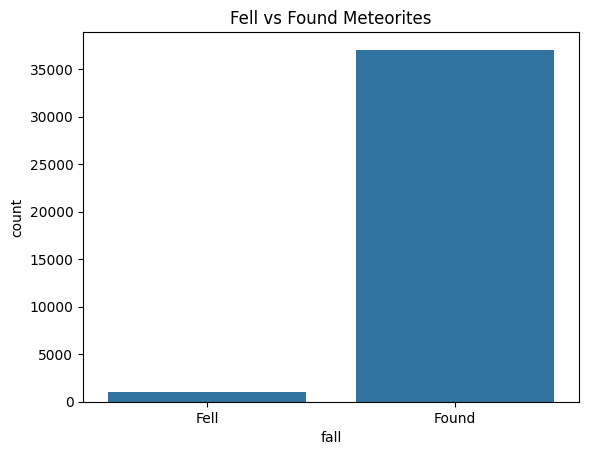

In [146]:
# Count plot for fall status
sns.countplot(x='fall', data=df)
plt.title("Fell vs Found Meteorites")
plt.show()

#### Histogram for mass (g)

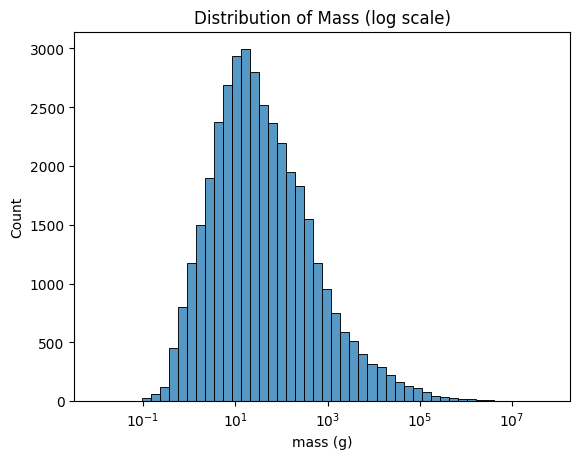

In [153]:
#plt.figure(figsize=(10,6))
sns.histplot(df['mass (g)'], bins=50, log_scale=True)
plt.title("Distribution of Mass (log scale)")
plt.show()